This notebook will act as a place for WD+WD post processing. Here I will analyze different properties that should be optimized for the simulations

In [2]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import useful_fncs 

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [3]:
# reading in the HDF5 file
pathToweights_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_NEW_LG_EDIT_2.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

# let's gather the system parameters group 

SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

Let's mak esure we are only looking at the WD+WD from this output

In [4]:
# gather the bool to only select for WD+WD 

WD_WD_bool = useful_fncs.WDWD_bools(SP_WD_data,'Stellar_Type(1)','Stellar_Type(2)')

# masking the data to just look for WD+WD
SP_WDWD_data = SP_WD_data[WD_WD_bool]

In [5]:
pd.set_option('display.max_columns', None)
display(SP_WDWD_data)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
1,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.890890,0.558981,2.321444,0.914988,0,0,0.000876,0.000876,0.0,0.0,0,1,1,0.997185,0.720324,5.859431,0.000719,-0.406432,-0.556034,6.277157,0.580181,198801.165570,412.982625,265.0,265.0,30.0,30.0,11,11,1,1,0.0,9025.539968,0,1.0,0.245931
9,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.102787,1.102454,4.349249,4.329800,0,0,0.004591,0.004591,0.0,0.0,0,1,9,0.364461,0.501875,3.136129,3.115036,-0.821753,-1.339439,1.986896,1.373245,59365.315016,69.686737,265.0,265.0,30.0,30.0,11,11,1,1,0.0,157.279070,0,1.0,0.152716
12,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.571069,0.746677,3.684305,2.204175,0,0,0.001030,0.001030,0.0,0.0,0,1,12,0.446222,0.740050,5.487653,1.654457,0.067530,-0.303690,4.546524,5.772658,5.941011,0.163756,265.0,265.0,30.0,30.0,11,11,1,1,0.0,594.089778,0,1.0,3.756308
13,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'NA ',0.887465,0.602687,4.078969,1.781343,0,0,0.027172,0.027172,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,12982.159973,12.142024,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1819.896095,0,1.0,0.092467
16,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'3 ',b'2 ',1.112307,0.145627,1.249458,0.881892,0,0,0.000781,0.000781,0.0,0.0,0,1,16,0.326656,0.523163,0.349892,3.460159,-1.140390,0.421279,0.874585,1.401659,20.967088,0.380175,265.0,265.0,30.0,30.0,10,10,1,1,0.0,9600.920352,0,1.0,9.043723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.275749,0.658100,6.139127,2.235004,0,0,0.029347,0.029347,0.0,0.0,0,1,999995,0.719032,0.460826,3.264003,4.386358,1.298580,1.137955,1.846045,3.903730,93115.659434,99.297629,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1156.571375,0,1.0,0.094042
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.780910,0.722761,2.547762,2.347377,0,0,0.014557,0.014557,0.0,0.0,0,1,999996,0.376224,0.083434,3.617568,2.676623,-0.381096,-0.559024,3.960636,2.509714,13891.321460,19.738301,265.0,265.0,30.0,30.0,11,11,1,1,0.0,913.213610,0,1.0,0.151815
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.381447,0.667080,7.142919,1.929326,0,0,0.016232,0.016232,0.0,0.0,0,1,999997,0.223393,0.947942,2.010605,1.238487,-0.178701,0.217135,0.529336,0.742038,22354.008782,34.672764,265.0,265.0,30.0,30.0,12,11,1,1,0.0,1503.425822,0,1.0,0.234124
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.942527,0.770343,3.106252,2.334912,0,0,0.003586,0.003586,0.0,0.0,0,1,999998,0.796172,0.013945,5.331922,1.883791,-0.859814,-0.800516,5.360359,1.443981,26039.406126,37.920752,265.0,265.0,30.0,30.0,11,11,1,1,0.0,742.013427,0,1.0,0.115753


#### Let's look at the mass distiburions

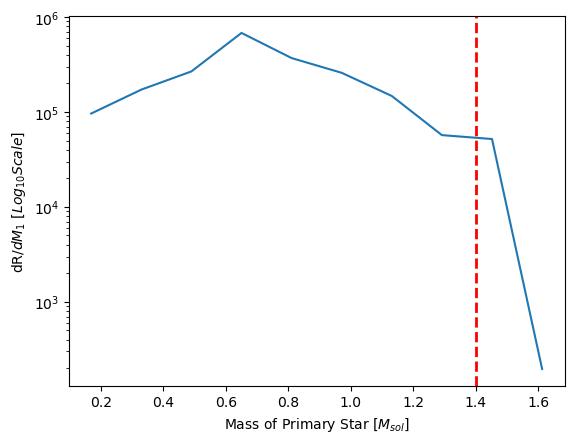

In [6]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_WDWD_data['Mass(1)'], weights=SP_WDWD_data['mixture_weight'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Mass of Primary Star [$M_{sol}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dM_{1}$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\

# chandrasekhar limit
chandra_limit = 1.4 

plt.axvline(chandra_limit, color='r', linestyle='--', linewidth=2)
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)

#### Let's find the time + delay time distirbution

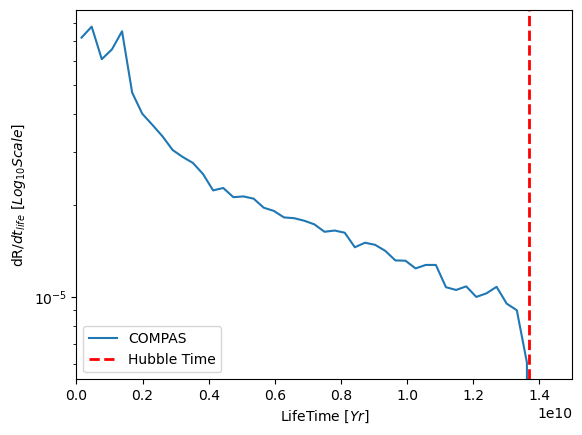

In [7]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_WDWD_data['Time']*1e6, weights=SP_WDWD_data['mixture_weight'],bins=np.linspace(0,15e9,50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='COMPAS')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"LifeTime [$Yr$]")
plt.yscale('log')
plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dt_{life}$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\

## hubble time
age_universe = 13.7e9

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
plt.legend()

In [8]:
# Add columns for the more and less massive compact object

SP_WDWD_data['M_moremass'] = SP_WDWD_data[['Mass(1)', 'Mass(2)']].max(axis=1)
SP_WDWD_data['M_lessmass'] = SP_WDWD_data[['Mass(1)', 'Mass(2)']].min(axis=1)

/tmp/ipykernel_2079074/2291312651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_WDWD_data['M_moremass'] = SP_WDWD_data[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_2079074/2291312651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_WDWD_data['M_lessmass'] = SP_WDWD_data[['Mass(1)', 'Mass(2)']].min(axis=1)


In [9]:
time_col_wd = useful_fncs.tgw((SP_WDWD_data['SemiMajorAxis'].values),(SP_WDWD_data['Eccentricity']),(SP_WDWD_data['M_moremass'].values),(SP_WDWD_data['M_lessmass'].values),Data_weights,'BSE_System_Parameters','SemiMajorAxis')

In [10]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(SP_WDWD_data['Time'])*1e6
t_col_lg = np.array(time_col_wd)*1e6

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(SP_WDWD_data.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)


In [11]:
t_delay_lg_array = np.array(t_delay_lg)

In [12]:
np.where(t_delay_lg_array<13.7e9)[0]

array([     8,     17,     25, ..., 842291, 842328, 842381])

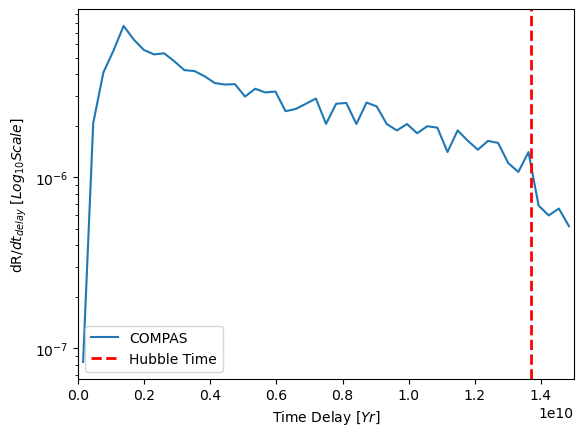

In [13]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(t_delay_lg_array, weights=SP_WDWD_data['mixture_weight'],bins=np.linspace(0,15e9,50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='COMPAS')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Time Delay [$Yr$]")
plt.yscale('log')
plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dt_{delay}$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\

## hubble time
age_universe = 13.7e9

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
plt.legend()

Text(0, 0.5, 'dR/$dr$ [$Log_{10} Scale$]')

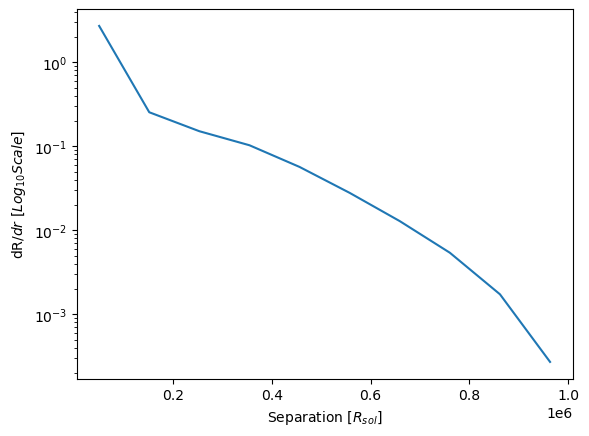

In [14]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_WDWD_data['SemiMajorAxis'], weights=SP_WDWD_data['mixture_weight'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Separation [$R_{sol}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dr$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\

# chandrasekhar limit
# chandra_limit = 1.4 

# plt.axvline(chandra_limit, color='r', linestyle='--', linewidth=2)
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)

We want to add to this plot so we have vertical lines corresponding to different conditions

In [15]:
### let's first do a case coresponding to 2 1 M_sun WDs - since this is a more massive system they have smaller delay times
example_separation = useful_fncs.separations(0,1,1,(0.175e10)*(1e-6))
example_separation

3.5516388731218367

Let's add this separation to our separation plot

Text(0, 0.5, 'dR/$dr$ [$Log_{10} Scale$]')

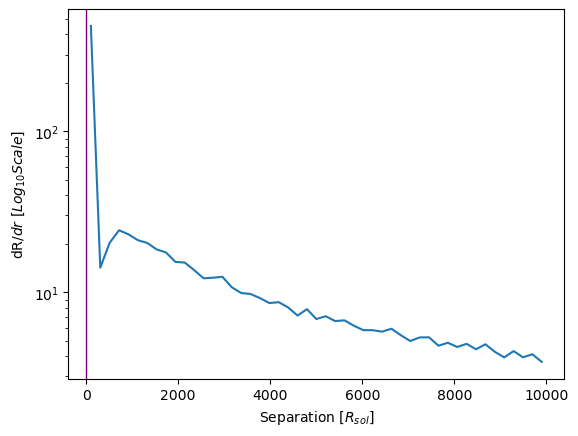

In [21]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_WDWD_data['SemiMajorAxis'], weights=SP_WDWD_data['mixture_weight'],bins=np.linspace(0,0.1e5,50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

## adding the extra separation conditions
plt.axvline(example_separation,color='purple',linestyle='-',linewidth=1)

plt.xlabel(r"Separation [$R_{sol}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dr$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\

# chandrasekhar limit
# chandra_limit = 1.4 

# plt.axvline(chandra_limit, color='r', linestyle='--', linewidth=2)
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)

#### Investigating the secondary masses of systems that have NaN masses 

In [37]:
nan_mask = np.where(~np.isnan(SP_WDWD_data['Mass(2)'])==False)[0]

In [38]:
print(len(SP_WDWD_data.iloc[nan_mask]))
weird_WDWD = SP_WDWD_data.iloc[nan_mask]
weird_WDWD_seeds = weird_WDWD['SEED']
weird_WDWD

15


,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
76164,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'4-8 ',b'5 ',0.808380,NaN,2.792781,2.533494,0,0,0.000104,0.000104,0.0,0.0,0,1,76164,0.700534,0.675839,5.311317,5.171071,-0.346293,-0.780983,1.429662,4.625180,31.571946,0.424560,265.0,265.0,30.0,30.0,11,11,1,1,0.0,476.625550,0,1.0,0.479547
160449,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2-8 ',b'5 ',0.796188,NaN,5.676667,2.907361,0,0,0.000111,0.000111,0.0,0.0,0,1,160449,0.222173,0.089523,0.411938,1.930070,0.525004,-0.812323,4.353415,3.954637,33.270564,0.410832,265.0,265.0,30.0,30.0,11,11,1,1,0.0,318.841963,0,1.0,0.128026
220796,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'5 ',1.086905,NaN,4.337317,2.891529,0,0,0.000128,0.000128,0.0,0.0,0,1,220796,0.388314,0.783533,3.032043,0.721811,0.025721,-0.662413,0.462214,4.980825,42.611331,6.075247,265.0,265.0,30.0,30.0,11,11,1,1,0.0,341.335508,0,1.0,0.152951
248745,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2-8 ',b'5 ',0.809289,NaN,6.118073,2.858380,0,0,0.000107,0.000107,0.0,0.0,0,1,248745,0.957658,0.603146,4.301045,3.857207,-0.370116,0.000329,5.952252,0.414629,31.532240,0.485158,265.0,265.0,30.0,30.0,11,11,1,1,0.0,337.831315,0,1.0,0.237089
341936,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'5 ',1.241623,NaN,5.190157,2.846372,0,0,0.000137,0.000137,0.0,0.0,0,1,341936,0.767580,0.977678,4.321166,2.590686,0.523258,-1.008290,0.564027,3.990874,46.580476,7.665111,265.0,265.0,30.0,30.0,12,11,1,1,0.0,354.951794,0,1.0,0.181621
390690,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.547024,NaN,3.521822,2.503963,0,0,0.000103,0.000103,0.0,0.0,0,1,390690,0.972259,0.079733,5.031324,5.622611,-0.728321,0.682687,2.641109,1.650154,19.290750,0.187996,265.0,265.0,30.0,30.0,11,11,1,1,0.0,415.195003,0,1.0,0.416401
418027,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.864751,NaN,4.972977,2.876057,0,0,0.000100,0.000100,0.0,0.0,0,1,418027,0.171763,0.652025,1.021203,0.145184,-1.357831,-0.867206,2.606426,2.634657,35.092901,0.436495,265.0,265.0,30.0,30.0,11,11,1,1,0.0,327.603536,0,1.0,0.175685
439679,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.817578,NaN,4.796557,2.717354,0,0,0.000120,0.000120,0.0,0.0,0,1,439679,0.410867,0.626500,1.782993,5.413069,0.572969,1.182716,5.528094,1.651036,32.692434,0.425520,265.0,265.0,30.0,30.0,11,11,1,1,0.0,373.346402,0,1.0,0.193059
480059,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.522216,NaN,3.393703,2.530239,0,0,0.000102,0.000102,0.0,0.0,0,1,480059,0.010465,0.870046,3.582408,2.601107,0.242248,0.276914,4.448985,3.579158,21.829910,0.178400,265.0,265.0,30.0,30.0,11,11,1,1,0.0,400.302711,0,1.0,0.609360
571705,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.745503,NaN,4.474262,2.680872,0,0,0.000108,0.000108,0.0,0.0,0,1,571705,0.160370,0.369334,0.097248,3.911085,0.275305,-0.077748,0.499808,5.775317,25.637191,0.328265,265.0,265.0,30.0,30.0,11,11,1,1,0.0,377.825326,0,1.0,0.273682


In [40]:
## let's see if these systems have nonzero masses in other groups

# let's gather the rlof group 

RLOF_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_RLOF"].keys(): #looping through the "keys" or paramters in BSE_RLOF

    RLOF_WD_data[key] = Data_weights["BSE_RLOF"][key][()] # adding these columns to the dataframe

In [41]:
# let's now only select the seeds in this table that overlap with RLOF table
overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],weird_WDWD_seeds)

In [42]:
# reading in the sliced table
RLOF_WD_data_weird = RLOF_WD_data[overlap_seeds_bool]
RLOF_WD_data_weird.sort_values(by="SEED")

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
79756,9.477542e-22,1,0.0,0.0,0.000444,NaN,3,0.808380,0.808380,2.706756,NaN,20730.201311,0,0.000104,0,0,0,1,0.010215,0.010215,0.000099,NaN,179.007362,0.000014,1.001054,NaN,1,76164,368.107443,31.571946,11,11,5,11,8298.156463,NaN,476.620034,476.625550,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
79757,1.220134e-01,0,0.0,0.0,317.827957,151.480093,1,2.764739,0.857224,2.533486,2.766228,297.151636,0,0.000104,0,1,0,0,36.101373,0.183722,1.017730,0.001969,1.949831,1.565152,0.057206,0.009855,1,76164,91.777388,329.146379,4,7,1,1,56917.431146,16202.726642,369.040643,369.135713,-0.146177,-0.146177,0.0,-0.146177,-0.333333,-0.333333,0.0,-0.333333
79758,6.993462e-04,0,0.0,0.0,7.410350,184.551988,2,0.857004,0.808380,2.766228,2.766262,56977.394796,0,0.000104,0,1,0,0,98.204952,0.010215,1.052567,0.000101,1.875398,1.875322,0.011807,0.010623,1,76164,329.166352,361.979321,8,11,1,1,94324.147472,15551.393925,372.941087,372.944536,0.000000,-0.146177,0.0,-0.146177,0.000000,-0.333333,0.0,-0.333333
132253,7.488069e-22,1,0.0,0.0,0.000149,NaN,3,0.796188,0.796188,2.937407,NaN,22467.762893,0,0.000111,0,0,0,1,0.010355,0.010355,0.000101,NaN,188.747437,0.000014,1.014710,NaN,1,160449,376.301080,33.270564,11,11,5,11,6272.815397,NaN,318.836820,318.841963,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
132254,1.971614e-02,0,0.0,0.0,271.948529,137.062469,1,5.676097,1.027933,2.907359,2.999003,900.888780,0,0.000111,0,1,0,0,39.257851,0.208940,1.014844,0.002935,1.299483,1.315724,0.045575,0.011360,1,160449,88.347845,244.563878,2,7,1,1,51331.988948,17235.533283,68.447314,68.465836,-0.145916,-0.145916,0.0,-0.145916,-0.333333,-0.333333,0.0,-0.333333
132255,7.086217e-04,0,0.0,0.0,7.511597,146.276709,2,1.027593,0.796188,2.999002,2.999166,29873.472876,0,0.000111,0,1,0,0,79.225573,0.010355,1.112808,0.000103,1.363003,1.363023,0.011766,0.007421,1,160449,244.584602,370.177405,8,11,1,1,94001.319755,17211.537700,90.345477,90.349836,0.000000,-0.145916,0.0,-0.145916,0.000000,-0.333333,0.0,-0.333333
157975,5.855646e-05,1,0.0,0.0,10.840567,145.020530,1,3.728907,1.086905,2.891524,2.891524,389889.932612,0,0.000128,0,1,0,0,573.541953,0.007064,1.002336,0.000060,1.429367,1.429367,0.002806,0.007753,1,220796,1426.520275,396.142532,6,11,1,1,124745.678420,16771.156970,134.558947,134.563947,0.000000,-0.146350,0.0,-0.146350,0.000000,-0.333333,0.0,-0.333333
157976,3.718429e-21,1,0.0,0.0,0.000247,NaN,2,1.086905,1.086905,2.828726,NaN,22404.348647,0,0.000128,0,0,0,1,0.007064,0.007064,0.000059,NaN,186.560974,0.000014,1.000131,NaN,1,220796,402.496128,42.611331,11,11,5,11,8620.455845,NaN,341.330311,341.335508,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
170112,1.162067e-02,0,0.0,0.0,384.715649,121.682753,1,6.117236,1.137111,2.858378,2.916250,1387.113398,0,0.000107,0,1,0,0,49.163538,0.225290,1.056449,0.003551,1.265885,1.277163,0.038475,0.013113,1,248745,104.334219,210.749196,2,7,1,1,53912.713989,16980.937354,59.362898,59.378036,-0.146021,-0.146021,0.0,-0.146021,-0.333333,-0.333333,0.0,-0.333333
170113,9.397230e-22,1,0.0,0.0,0.000123,NaN,3,0.809289,0.809289,2.856466,NaN,20876.344843,0,0.000107,0,0,0,1,0.010204,0.010204,0.000100,NaN,182.222723,0.000014,1.012558,NaN,1,248745,366.953666,31.532240,11,11,5,11,6029.525100,NaN,337.825923,337.831315,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
